# Proyecto 3

## Aprendizaje Colaborativo Internacional en Línea

Esta tarea se encuentra en el marco de la aplicación del programa de Aprendizaje Colaborativo Internacional en Línea (COIL – siglas en inglés de “Collaborative Online International Learning”) de la Asociación de Universidades Confiadas a la Compañía de Jesús en América Latina (AUSJAL).

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import requests

El siguiente análisis busca responder la pregunta: ## ¿Existe una correlación estadísticamente significativa entre la tasa de empleo y el PIB en México, Japón y Estados Unidos entre 2019 y 2023? ¿Cómo difiere esta relación entre los países, y qué impacto ha tenido sobre los distintos sectores productivos?

In [46]:
# Función para obtener datos de un país
def get_employment_rate(country_code, start_year, end_year):
    url = f"https://api.worldbank.org/V2/country/{country_code}/indicator/SL.EMP.TOTL.SP.ZS"
    params = {
        "format": "json",
        "date": f"{start_year}:{end_year}",
        "per_page": 100
    }
    
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        if len(data) > 1:  # Verifica que haya datos disponibles
            return data[1]  # Los datos están en el segundo elemento del JSON
    return []

# Obtener datos para los países
countries = {"Mexico": "MEX", "USA": "USA", "Japan": "JPN"}
start_year = 2019
end_year = 2023

# Crear un DataFrame para almacenar los resultados
results = []

for country, code in countries.items():
    data = get_employment_rate(code, start_year, end_year)
    for entry in data:
        if "date" in entry and "value" in entry:
            results.append({
                "Country": country,
                "Year": entry["date"],
                "Employment Rate (%)": entry["value"]
            })

# Convertir los resultados a un DataFrame de pandas
employment_df = pd.DataFrame(results)

# Mostrar resultados
print(employment_df)

   Country  Year  Employment Rate (%)
0   Mexico  2023               59.782
1   Mexico  2022               59.013
2   Mexico  2021               57.486
3   Mexico  2020               53.977
4   Mexico  2019               59.038
5      USA  2023               59.600
6      USA  2022               59.266
7      USA  2021               57.946
8      USA  2020               56.380
9      USA  2019               60.329
10   Japan  2023               61.244
11   Japan  2022               60.875
12   Japan  2021               60.362
13   Japan  2020               60.209
14   Japan  2019               60.553


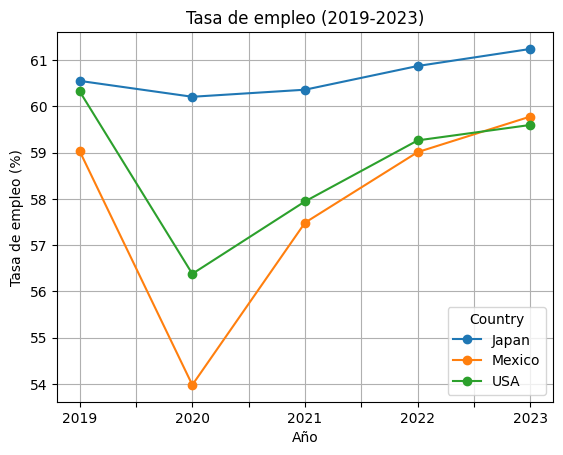

In [47]:
# Usar el dataframe para crear una visualización

df.pivot(index="Year", columns="Country", values="Employment Rate (%)").plot(kind="line", marker='o')
plt.title("Tasa de empleo (2019-2023)")
plt.ylabel("Tasa de empleo (%)")
plt.xlabel("Año")
plt.grid(True)
plt.show()

Se puede observar que en los paises analizados hubo un marcado descenso en la tasa de empleo en el año 2020, que coincide con la crisis global que significo la pandemia de COVID-19

In [48]:
# Función para obtener datos del PIB
def get_gdp_data(country_code, start_year, end_year):
    url = f"https://api.worldbank.org/V2/country/{country_code}/indicator/NY.GDP.MKTP.KD"
    params = {
        "format": "json",
        "date": f"{start_year}:{end_year}",
        "per_page": 100
    }
    
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        if len(data) > 1:  # Verifica que haya datos disponibles
            return data[1]  # Los datos están en el segundo elemento del JSON
    return []

# Obtener datos para los países
countries = {"Mexico": "MEX", "USA": "USA", "Japan": "JPN"}
start_year = 2019
end_year = 2023

# Crear un DataFrame para almacenar los resultados
gdp_results = []

for country, code in countries.items():
    data = get_gdp_data(code, start_year, end_year)
    for entry in data:
        if "date" in entry and "value" in entry:
            gdp_results.append({
                "Country": country,
                "Year": entry["date"],
                "GDP (constant USD)": entry["value"]
            })

# Convertir los resultados a un DataFrame
gdp_df = pd.DataFrame(gdp_results)
gdp_df["GDP (billion USD)"] = gdp_df["GDP (constant USD)"] / 1e9

# Mostrar resultados
print(gdp_df)

   Country  Year  GDP (constant USD)  GDP (billion USD)
0   Mexico  2023        1.326555e+12        1326.554713
1   Mexico  2022        1.285063e+12        1285.063398
2   Mexico  2021        1.236244e+12        1236.244118
3   Mexico  2020        1.169144e+12        1169.144481
4   Mexico  2019        1.279495e+12        1279.495263
5      USA  2023        2.177628e+13       21776.284674
6      USA  2022        2.123631e+13       21236.308982
7      USA  2021        2.083309e+13       20833.085468
8      USA  2020        1.969097e+13       19690.968695
9      USA  2019        2.013669e+13       20136.688111
10   Japan  2023        4.616966e+12        4616.966465
11   Japan  2022        4.529855e+12        4529.854841
12   Japan  2021        4.487016e+12        4487.015645
13   Japan  2020        4.375044e+12        4375.044252
14   Japan  2019        4.564333e+12        4564.332550


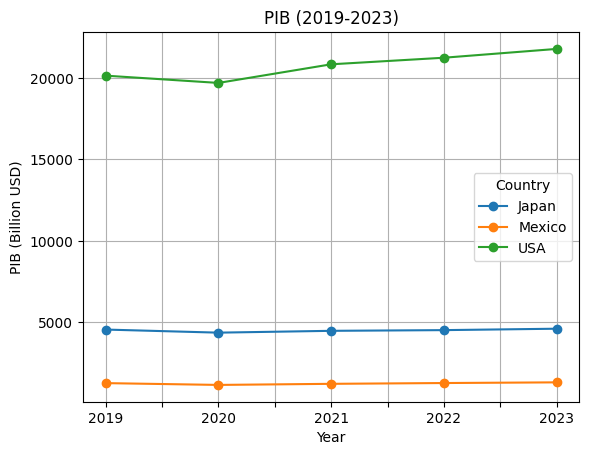

In [49]:
# Crear una gráfica para visualizar los datos

gdp_df.pivot(index="Year", columns="Country", values="GDP (billion USD)").plot(kind="line", marker='o')
plt.title("PIB (2019-2023)")
plt.ylabel("PIB (Billion USD)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

Se puede observar que en los tres paises la variable PIB se mantiene relativamente estable, presentando en todos los casos un leve descenso en 2020 para luego recuperarse.

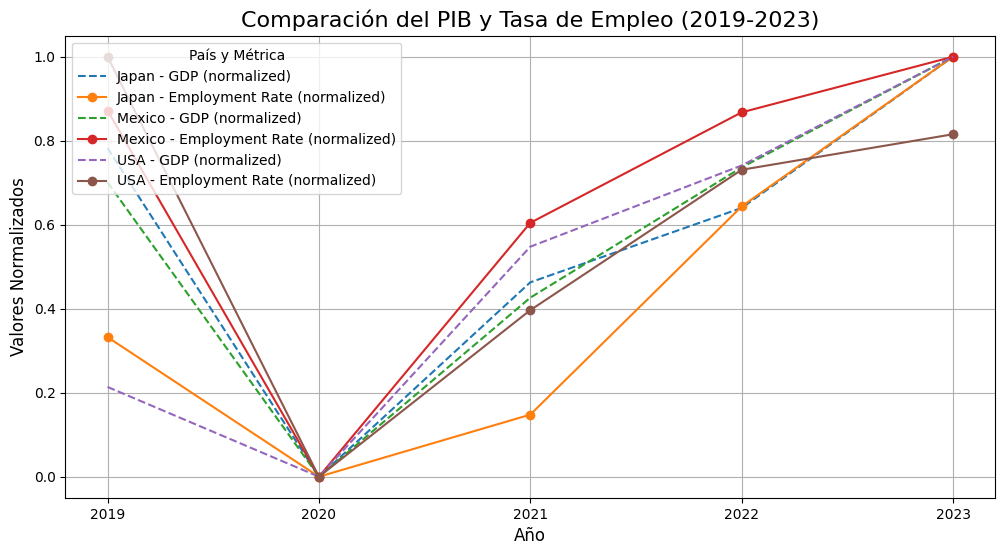

In [50]:
# Combina los DataFrames de PIB y empleo en uno
combined_df = pd.merge(
    gdp_df.rename(columns={"GDP (constant USD)": "GDP"}), 
    employment_df.rename(columns={"Employment Rate (%)": "Employment Rate"}), 
    on=["Country", "Year"]
)

# Ordenar el DataFrame por País y Año
combined_df = combined_df.sort_values(by=["Country", "Year"])

# Normalizar los datos
combined_df["Normalized GDP"] = combined_df.groupby("Country")["GDP"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
combined_df["Normalized Employment Rate"] = combined_df.groupby("Country")["Employment Rate"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

# Crear gráfico
plt.figure(figsize=(12, 6))

# Iterar sobre los países
for country in combined_df["Country"].unique():
    country_data = combined_df[combined_df["Country"] == country]
    plt.plot(country_data["Year"], country_data["Normalized GDP"], label=f"{country} - GDP (normalized)", linestyle='--')
    plt.plot(country_data["Year"], country_data["Normalized Employment Rate"], label=f"{country} - Employment Rate (normalized)", marker='o')

# Personalizar gráfico
plt.title("Comparación del PIB y Tasa de Empleo (2019-2023)", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Valores Normalizados", fontsize=12)
plt.legend(title="País y Métrica", fontsize=10, loc="upper left")
plt.grid(True)
plt.show()

A simple vista, al combinar ambas variables normalizadas, podemos ver que ambas decrecen y crecen durante los mismos períodos. Pero esto no es suficiente para determinar su relación.

Usar la correlación de Pearson para determinar si las variables PIB y Tasa de empleo estan relacionadas

In [51]:
correlation = combined_df[["GDP", "Employment Rate"]].corr()
print(correlation)

                      GDP  Employment Rate
GDP              1.000000        -0.028144
Employment Rate -0.028144         1.000000


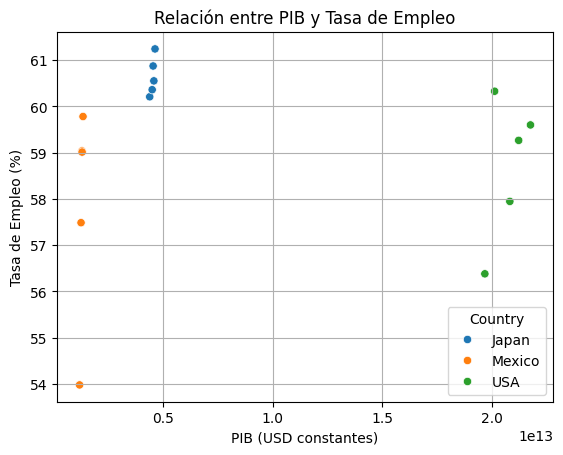

In [52]:
import seaborn as sns

sns.scatterplot(data=combined_df, x="GDP", y="Employment Rate", hue="Country")
plt.title("Relación entre PIB y Tasa de Empleo")
plt.xlabel("PIB (USD constantes)")
plt.ylabel("Tasa de Empleo (%)")
plt.grid(True)
plt.show()

Analizando la gráfica de dispersión podemos ver que no existe un patrón claro que relacione las variables.

In [53]:
from sklearn.linear_model import LinearRegression  # Corregido: sklearn en lugar de scikit-learn

# Selección de variables
X = combined_df["GDP"].values.reshape(-1, 1)  # PIB como variable independiente
y = combined_df["Employment Rate"].values      # Tasa de empleo como variable dependiente

# Ajustar el modelo
model = LinearRegression()
model.fit(X, y)

# Coeficientes del modelo
print(f"Pendiente (Coeficiente): {model.coef_[0]}")
print(f"Intersección (Intercepto): {model.intercept_}")
print(f"R² (Coeficiente de determinación): {model.score(X, y)}")

Pendiente (Coeficiente): -6.1742961025407514e-15
Intersección (Intercepto): 59.125224003150564
R² (Coeficiente de determinación): 0.0007921123471761327
